The first step is to import necessary libraries and the training and testing datasets as dataframes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('Data/train.csv')
df2 = pd.read_csv('Data/test.csv')

Using the head() function will allow us to see the first 5 rows of the dataset and see its structure.

In [2]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone,credit_card,id,estimated_check_in_duration,booking_difficulty_score
0,Resort Hotel,0,NaN,9,March,2017,2,0.820075,2.546977,1,...,0,Check-Out,2017-03-06,Edward Davis,EDavis@mail.com,129-327-5067,************1227,33852,NaN,NaN
1,City Hotel,0,82.916916,11,March,2017,15,-0.325630,2.002309,2,...,2,Check-Out,2017-03-16,Joshua Sullivan,JSullivan@zoho.com,748-584-5256,************7930,97750,47.282901,-3.218666
2,City Hotel,0,24.534646,44,October,2016,23,1.820523,1.289780,1,...,1,Check-Out,2016-10-25,Zachary Bishop,Bishop_Zachary@gmail.com,880-124-3628,************2924,100248,13.811002,3.859197
3,City Hotel,1,169.265992,12,March,2017,23,0.721699,1.848563,2,...,2,Canceled,2017-01-19,Victoria Kent,Victoria.Kent@aol.com,814-180-1532,************7923,65077,81.319112,1.510322
4,City Hotel,0,-22.240921,3,Veganuary,2017,19,-0.097702,1.045354,2,...,1,Canceled,2016-10-26,Michael Johnson,Johnson_Michael11@xfinity.com,118-263-8905,************9630,62714,-9.889995,4.345359


In [3]:
df2.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone,credit_card,id,estimated_check_in_duration,booking_difficulty_score
0,City Hotel,26.298895,30,July,2016,19,0.420785,3.999927,3,0.0,...,1,Canceled,2016-07-04,Samantha Adams,SAdams@protonmail.com,762-421-5019,************8511,54530,17.041274,3.019465
1,Resort Hotel,92.577726,40,September,2016,27,-0.747042,0.102923,1,0.0,...,0,Check-Out,2016-09-28,Keith Hoffman,Hoffman_Keith@yahoo.com,893-041-9439,************7474,21700,41.610677,-1.607991
2,City Hotel,227.333980,38,September,2015,18,-0.454248,3.911471,2,0.0,...,0,Canceled,2015-03-25,Frank Terry,Frank.T91@att.com,963-035-5483,************9831,74790,109.138554,1.928529
3,City Hotel,60.329037,28,July,2016,7,-0.403903,2.109956,2,0.0,...,2,Check-Out,2016-07-09,Thomas Stevens,Thomas_Stevens64@gmail.com,145-450-3265,************1211,92567,35.606458,0.478480
4,City Hotel,89.803416,25,June,2016,12,2.490176,3.129876,2,0.0,...,0,Canceled,2016-01-11,Tiffany Rojas,Tiffany.R@mail.com,367-892-4321,************3254,52846,50.549688,1.658147


A problem that is immediately noticable is that the arrival_date_day_of_month and arrival_date_week number has been mistakenly swapped.
This will be corrected in the following code.

In [4]:
## Swapping incorrect year and week columns
col_list = list(df1)
col_list[3], col_list[5] = col_list[5], col_list[3]
df1.columns = col_list

col_list = list(df2)
col_list[2], col_list[4] = col_list[4], col_list[2]
df2.columns = col_list

In [5]:
# import plotly.express as px

# for col in df1.columns:
#     plt = px.histogram(df1, x = col, color ="is_canceled", title=col + ' vs is_canceled')
#     plt.show()

In [6]:
#removing L room types which are low in numbers and does not exist in the test dataset
df1 = df1[df1.assigned_room_type != 'L']

The info() function tells us the the structure of the dataset and shows us how many missing values there are. 
This will be important when we create the preprocessing function later.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83572 entries, 0 to 83572
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83572 non-null  object 
 1   is_canceled                     83572 non-null  int64  
 2   lead_time                       79289 non-null  float64
 3   arrival_date_week_number        83572 non-null  int64  
 4   arrival_date_month              83572 non-null  object 
 5   arrival_date_year               83572 non-null  int64  
 6   arrival_date_day_of_month       83572 non-null  int64  
 7   stays_in_weekend_nights         83572 non-null  float64
 8   stays_in_week_nights            83572 non-null  float64
 9   adults                          83572 non-null  int64  
 10  children                        83570 non-null  float64
 11  babies                          83572 non-null  int64  
 12  meal                            79289

We can see that there are a total of 83572 rows but several columns such as 'company', 'lead_time', 'meal', and 'country' contain many missing values.

In [8]:
df1.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id,estimated_check_in_duration,booking_difficulty_score
count,83572.000000,79289.000000,83572.000000,83572.000000,83572.000000,83572.000000,83572.000000,83572.000000,83570.00000,83572.000000,...,83572.000000,72224.000000,4674.000000,83572.000000,79289.000000,83572.000000,83572.000000,83572.000000,79289.000000,79289.000000
mean,0.397202,103.378985,27.120303,2016.155925,15.788063,0.928773,2.492890,1.859223,0.10292,0.008137,...,0.220684,86.603774,186.998074,2.321636,101.734898,0.061791,0.572752,59698.911226,51.673498,1.293792
std,0.489321,119.377243,13.619749,0.707374,8.782540,1.118729,2.126714,0.594784,0.39728,0.096017,...,0.654789,110.672677,130.511313,19.326472,57.456664,0.243446,0.794275,34498.702055,60.534993,2.294591
min,0.000000,-227.156938,1.000000,2015.000000,1.000000,-1.791310,-3.794357,0.000000,0.00000,0.000000,...,0.000000,1.000000,9.000000,-36.442446,-80.136040,0.000000,0.000000,1.000000,-123.491940,-5.127325
25%,0.000000,18.368606,16.000000,2016.000000,8.000000,0.065456,1.105951,2.000000,0.00000,0.000000,...,0.000000,9.000000,59.000000,-5.701492,65.608619,0.000000,0.000000,29788.750000,8.511831,0.102999
50%,0.000000,79.567092,27.000000,2016.000000,16.000000,0.795766,2.217651,2.000000,0.00000,0.000000,...,0.000000,14.000000,174.000000,0.394768,96.152179,0.000000,0.000000,59782.500000,40.425592,1.090571
75%,1.000000,167.572929,38.000000,2017.000000,23.000000,1.713248,3.551790,2.000000,0.00000,0.000000,...,0.000000,229.000000,268.000000,6.589788,131.647921,0.000000,1.000000,89525.250000,84.542614,2.131484
max,1.000000,741.651834,53.000000,2017.000000,31.000000,19.232182,49.354003,55.000000,10.00000,9.000000,...,20.000000,535.000000,543.000000,401.792112,5411.546686,8.000000,5.000000,119390.000000,370.155876,55.593803


In [9]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                          4283
arrival_date_week_number              0
arrival_date_month                    0
arrival_date_year                     0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              2
babies                                0
meal                               4283
country                            4540
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11348
company                           78898


In [10]:
#creating a function to preprocess the testing and training datasets.
def preprocessing(dataframe):

    # Converting typo 'Veganuary' to 'January'
    dataframe['arrival_date_month'] = dataframe['arrival_date_month'].str.replace('Veganuary', 'January')

    # Converting negative values to positive and rounding them
    for col in ['lead_time', 'days_in_waiting_list', 'adr', 'estimated_check_in_duration', 
                'booking_difficulty_score', 'stays_in_weekend_nights', 'stays_in_week_nights']:
        dataframe[col] = dataframe[col].abs().round()

    # filling missing rows with average
    ####dataframe.dropna(subset=['lead_time'], axis=0, inplace=True)
    columnsWithNa = ['lead_time', 'estimated_check_in_duration', 'adr','children', 'booking_difficulty_score' ]
    for column in columnsWithNa :
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())

    # dataframe['children'] = dataframe['children'].fillna(value=0)

    # Creating new features for private booking and booking without agent
    dataframe.loc[~dataframe['company'].isnull(), 'private_booking'] = 0
    dataframe['private_booking'] = dataframe['private_booking'].fillna(1)
    
    dataframe.loc[~dataframe['agent'].isnull(), 'booking_without_agent'] = 0
    dataframe['booking_without_agent'] = dataframe['booking_without_agent'].fillna(1)

    # Changing unavailable entries to 'N/A'
    for col in ['market_segment', 'distribution_channel']:
        dataframe.loc[dataframe[col].isin(['UNAVAILABLE', 'MISSING', 'UNKNOWN', 'Undefined']), col] = 'N/A'

    # Dropping unnecessary columns
    dataframe.drop(['agent', 'company', 'name', 'email', 'phone', 'credit_card', 'meal', 'country'], axis=1, inplace=True)

    # Handling reservation status date and creating date_delta
    dataframe['reservation_status_date'] = pd.to_datetime(dataframe['reservation_status_date'], errors='coerce')
    dataframe['date_delta'] = (dataframe['reservation_status_date'] - dataframe['reservation_status_date'].min()) / np.timedelta64(1, 'D')
    dataframe.drop('reservation_status_date', axis=1, inplace=True)

    # # # One-hot encoding categorical columns
    # dataframe = pd.get_dummies(dataframe, columns=["hotel", "arrival_date_month", 'market_segment', 
    # 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])

    return dataframe

In [11]:
df1 = preprocessing(df1)
# for some reason onehot encoding was not working in the function
df1 = pd.get_dummies(df1, columns=["hotel", "arrival_date_month", 'market_segment', 'distribution_channel', 
                                   'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'],drop_first=True)


In [12]:

df2 = preprocessing(df2)
df2 = pd.get_dummies(df2, columns=["hotel", "arrival_date_month", 'market_segment', 'distribution_channel', 'reserved_room_type', 
                                   'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'],drop_first=True)


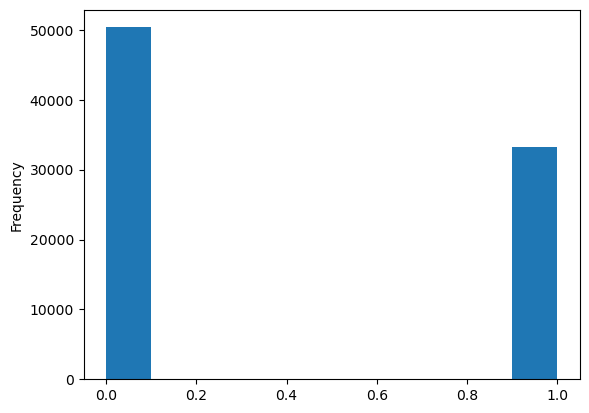

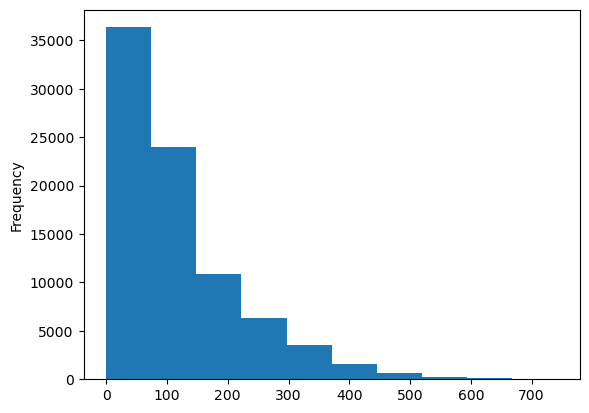

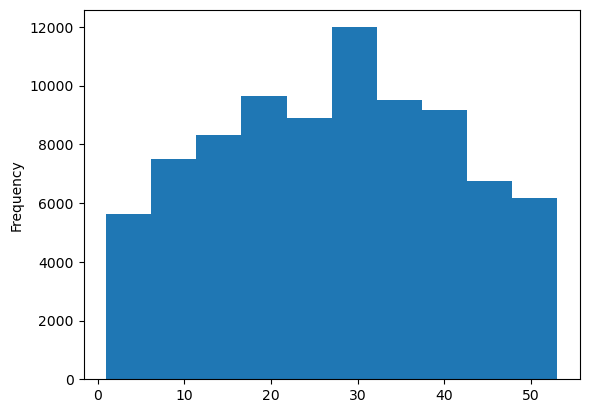

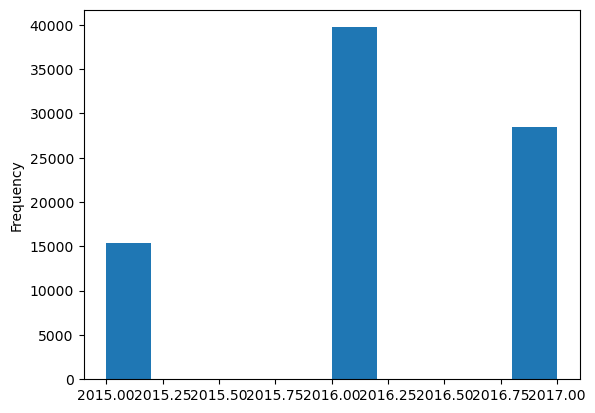

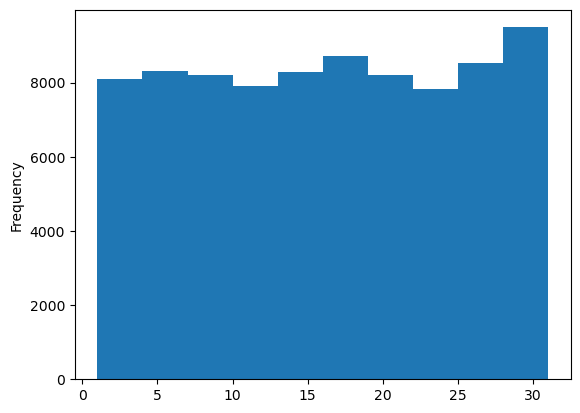

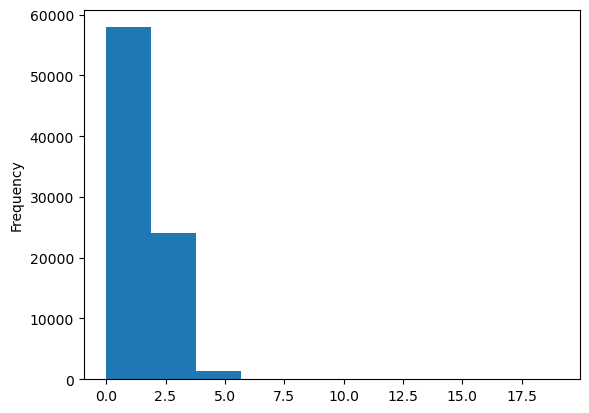

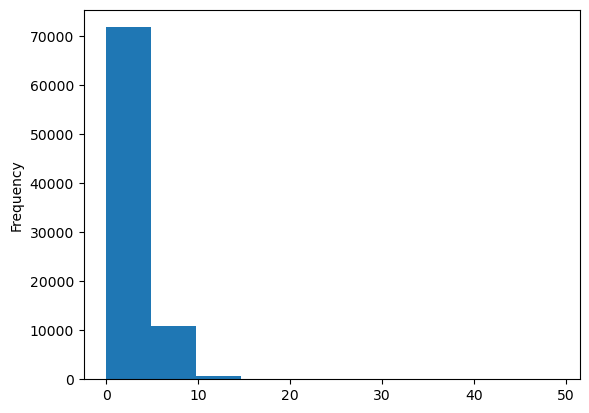

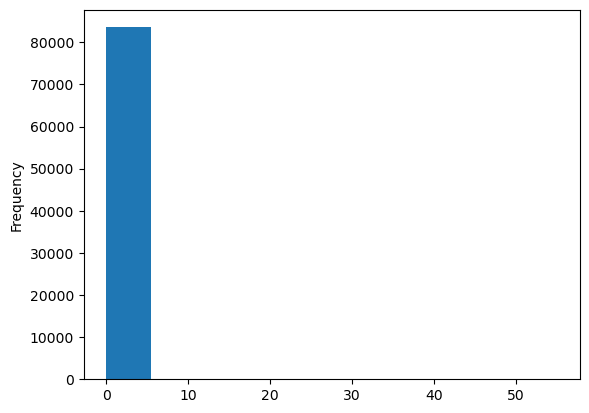

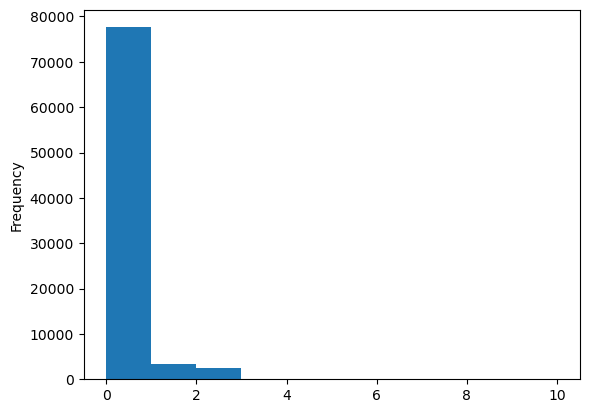

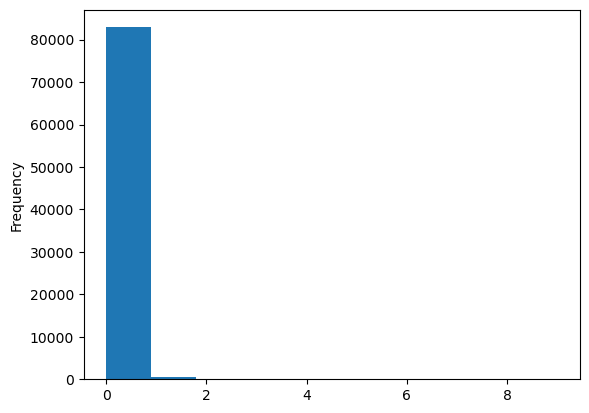

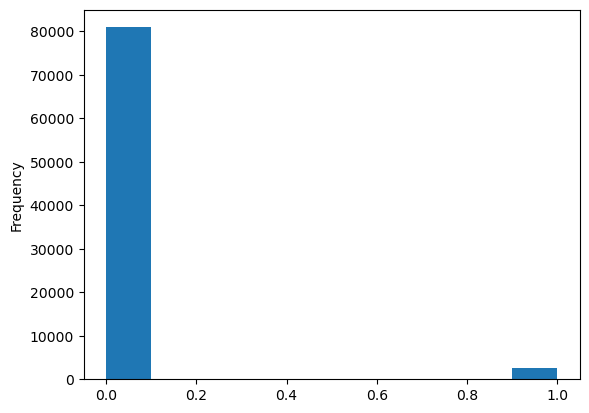

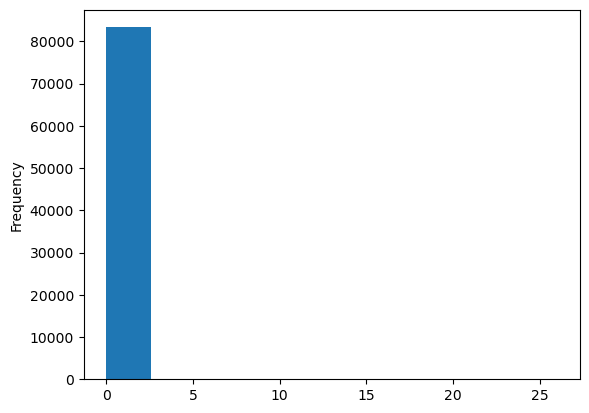

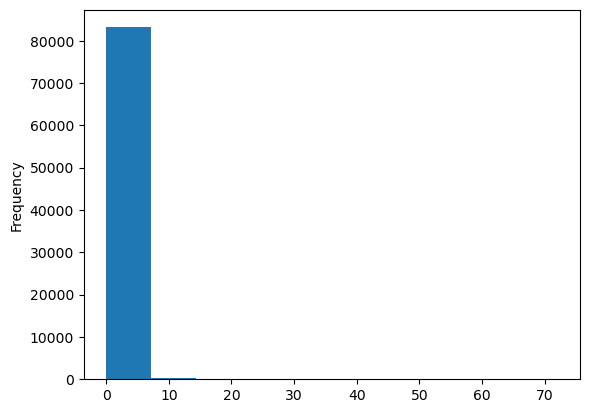

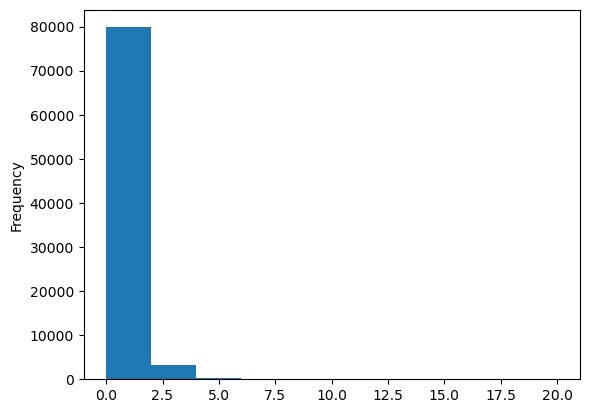

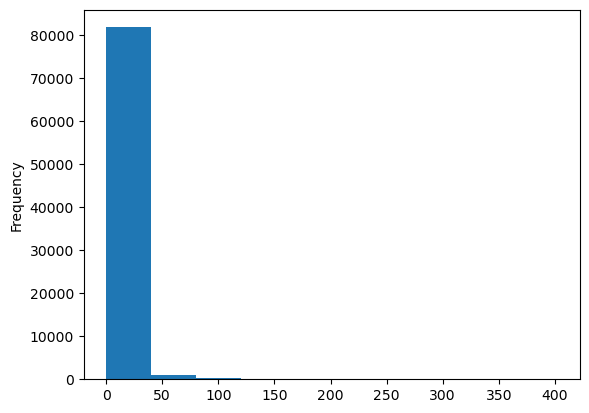

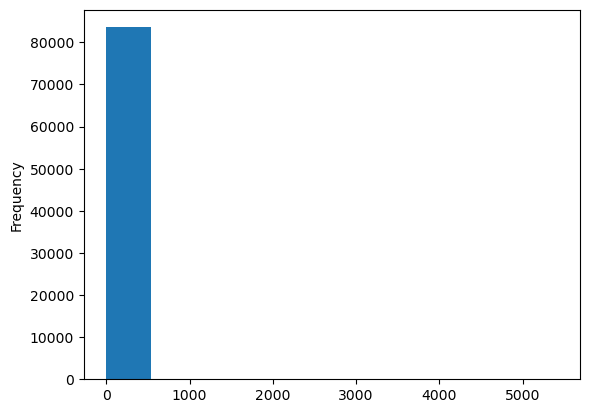

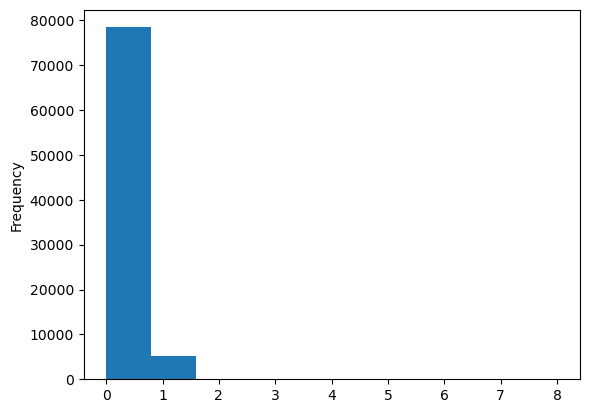

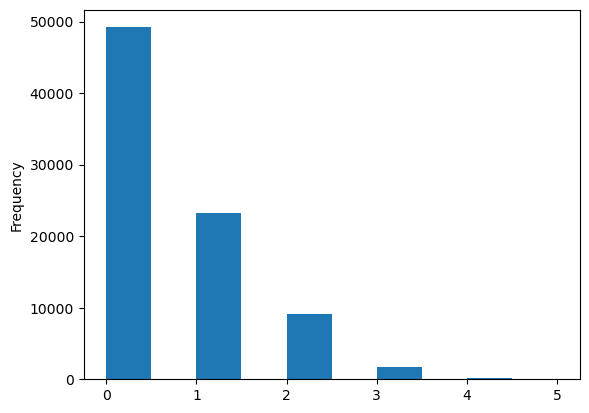

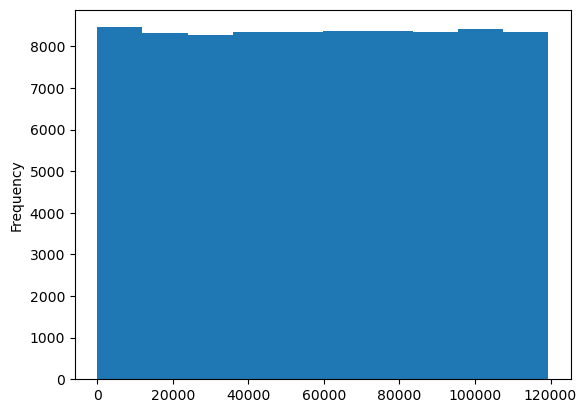

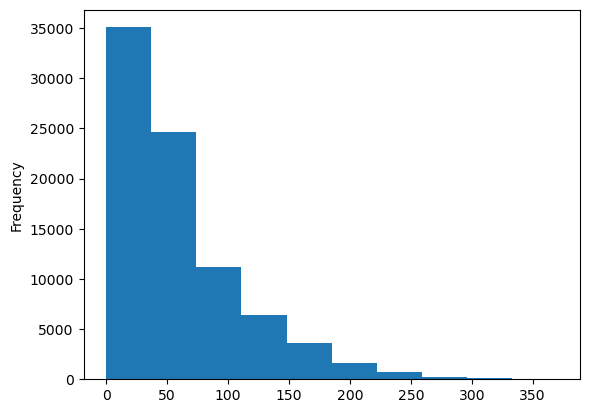

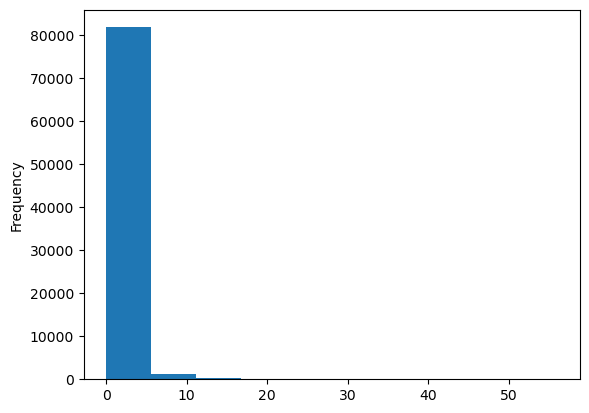

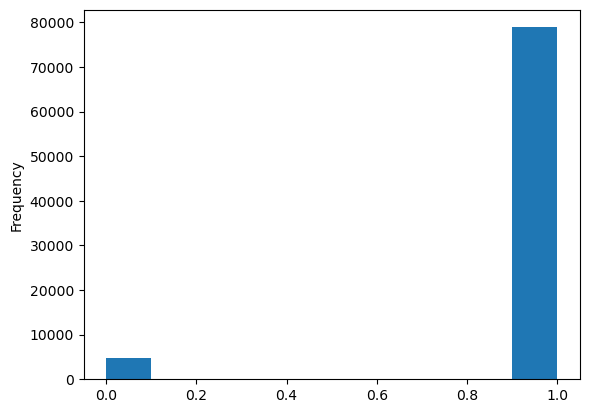

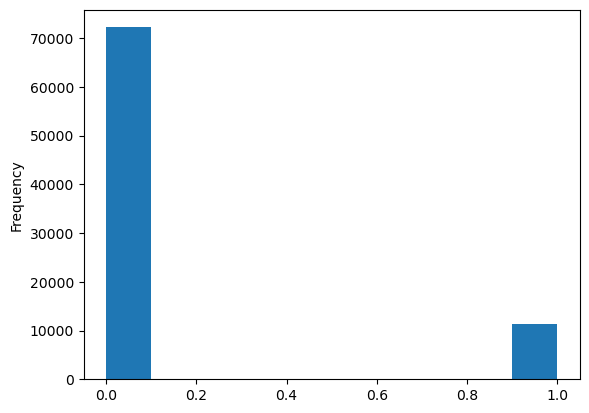

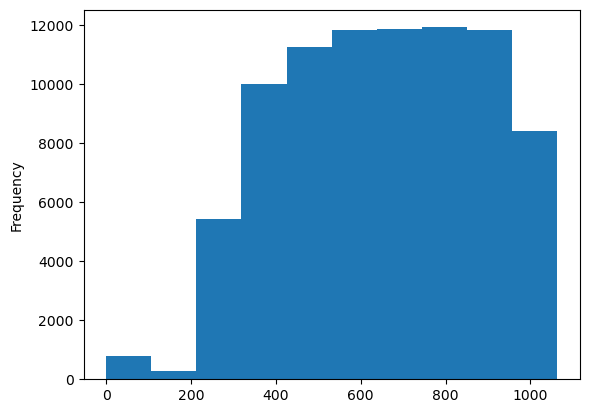

f:\Conda\Lib\site-packages\pandas\plotting\_matplotlib\hist.py:87: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bins = np.histogram(


TypeError: no numeric data to plot

In [14]:
for col in df1:
    df1[col].plot(kind="hist")
    plt.show()

In [ ]:
df2.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#specify size of heatmap
fig, ax = plt.subplots(figsize=(30, 30))

#create seaborn heatmap
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score


X = df1.drop('is_canceled', axis=1) 
y = df1['is_canceled']           
X_train, X_test, y_train, y_test = train_test_split(df1.drop('is_canceled',axis=1), 
           df1['is_canceled'], test_size=0.25, 
            random_state=42)



logmodel = RandomForestClassifier()
result = logmodel.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%') #Check accuracy of model

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average="macro")
print(f"f1 score: {score}")

In [ ]:
df2['is_canceled'] = logmodel.predict(df2)

In [ ]:
df3 = df2.loc[:, ["id", "is_canceled"]] 

In [ ]:
df3.head()

In [ ]:
df3.to_csv('output_4.csv', sep=',', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from matplotlib import pyplot as plt

matrix = confusion_matrix(y_test, y_pred, normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=matrix) 
# Then just plot it: 
disp.plot() 
# And show it: 
plt.show()